$$ J = (\mathbf{z} - \mathbf{Hx})^\text{T} \mathbf{S_z}^{-1} (\mathbf{z}-\mathbf{Hx}) + (\mathbf{x}-\mathbf{x}_0)^\text{T} \mathbf{S_x}^{-1} (\mathbf{x}-\mathbf{x}_0) $$

In [1]:
from var4d_components import Var4D_Components
from visualize_results import Visualize_Obs, Visualize_Fluxes
import os
os.environ['OMP_NUM_THREADS'] = '14' # use multi-threaded library if available

# First (example) inversion
* Only assimilate NOAA observatories Mauna Loa (MLO), Barrow (BRW), Samoa (SMO) and South Pole (SPO)
* Error in flux = 0.25 $\times$ absolute flux

In [2]:
var4d = Var4D_Components('only_noaa_observatories', verbose=True, store_intermediate=True)
flux_corr_structure = {'temp_corr': 2.0} # 2-month temporal correlation, no horizontal correlation
obs_assim_dict = {'sites': ['mlo', 'spo', 'brw', 'smo']} # just the four observatories
var4d.var4d_setup(obs_to_assim=obs_assim_dict, corr_structure=flux_corr_structure, prior_unc_scale=0.25) # prior flux error = 0.25 * abs(prior flux)
var4d.var4d_chain(max_iter=500, optim_method='BFGS')

Converting CT2022 to state vector: 100%|██████████| 24/24 [00:00<00:00, 42.24it/s]


    Read Jacobian in  17.62s
    Simulated transport in  0.46s
1245 of 1156383 obs will be assimilated
  Created true obs in  19.48s


Converting SiB4 to state vector: 100%|██████████| 24/24 [00:01<00:00, 13.73it/s]


  Prior fluxes and covariance setup in  1.88s
  Simulated transport in  0.46s
      Simulated transport in  0.46s
    [1] Cost calculated in  0.57s (J = 3.015e+04)
    [1] Gradient calculated in  0.59s (⎸∂J/∂ξ⎹ = 8231)
      Simulated transport in  0.46s
    [2] Cost calculated in  0.55s (J = 2.521e+04)
    [2] Gradient calculated in  0.60s (⎸∂J/∂ξ⎹ = 7480)
      Simulated transport in  0.46s
    [3] Cost calculated in  0.56s (J = 1.69e+04)
    [3] Gradient calculated in  0.61s (⎸∂J/∂ξ⎹ = 4769)
      Simulated transport in  0.46s
    [4] Cost calculated in  0.56s (J = 1.564e+04)
    [4] Gradient calculated in  0.59s (⎸∂J/∂ξ⎹ = 8215)
      Simulated transport in  0.47s
    [5] Cost calculated in  0.56s (J = 1.364e+04)
    [5] Gradient calculated in  0.61s (⎸∂J/∂ξ⎹ = 7869)
      Simulated transport in  0.47s
    [6] Cost calculated in  0.58s (J = 1.641e+04)
    [6] Gradient calculated in  0.59s (⎸∂J/∂ξ⎹ = 8251)
      Simulated transport in  0.47s
    [7] Cost calculated in  0.57s (J = 1.

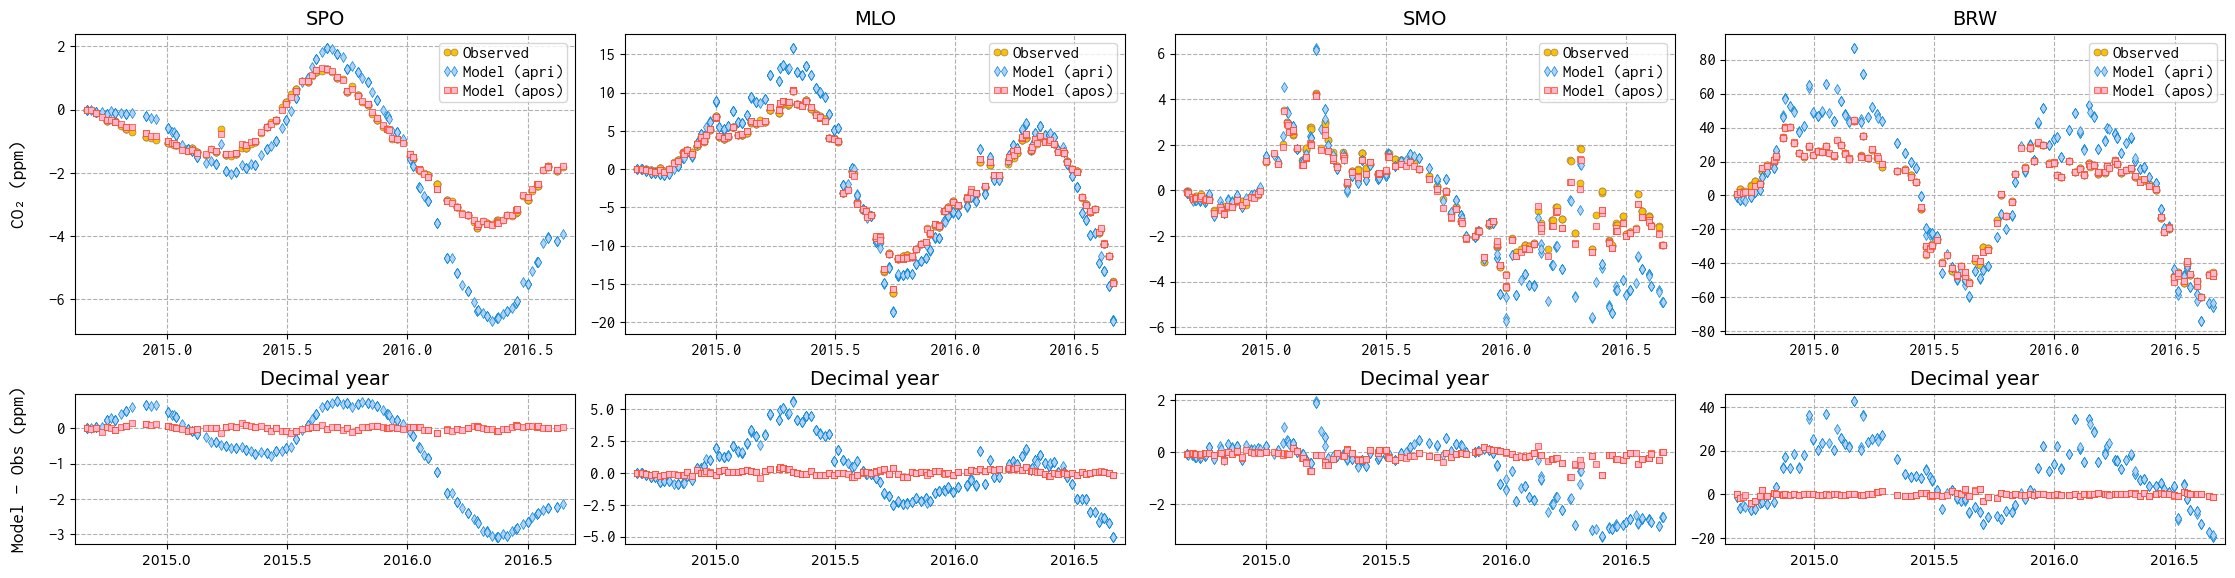

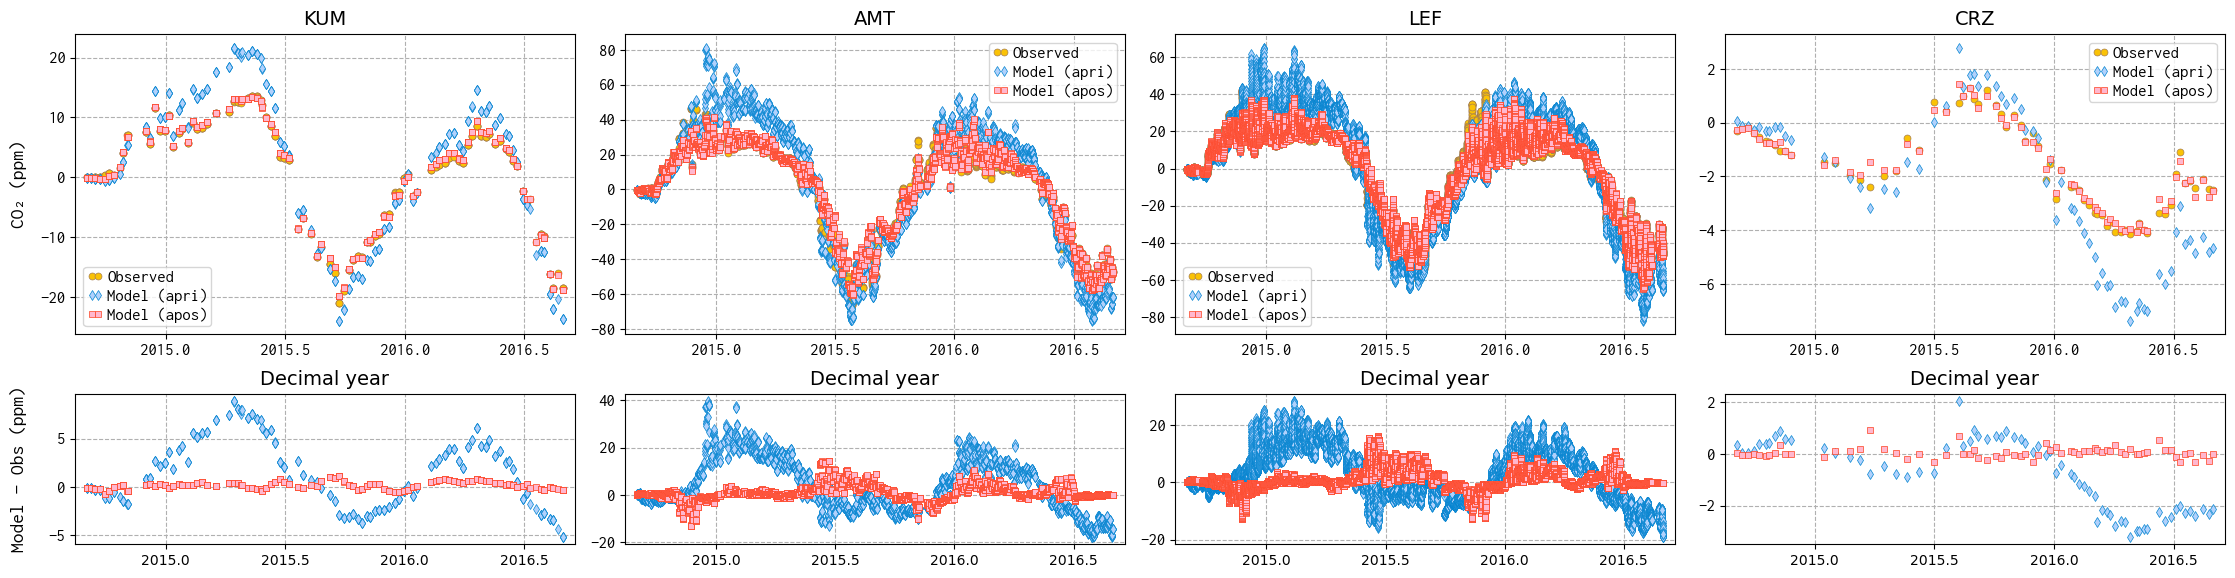

In [4]:
po1 = Visualize_Obs('only_noaa_observatories')
po1.plot_site(['spo','mlo','smo', 'brw'])
po1.plot_site(['kum','amt','lef','crz'])

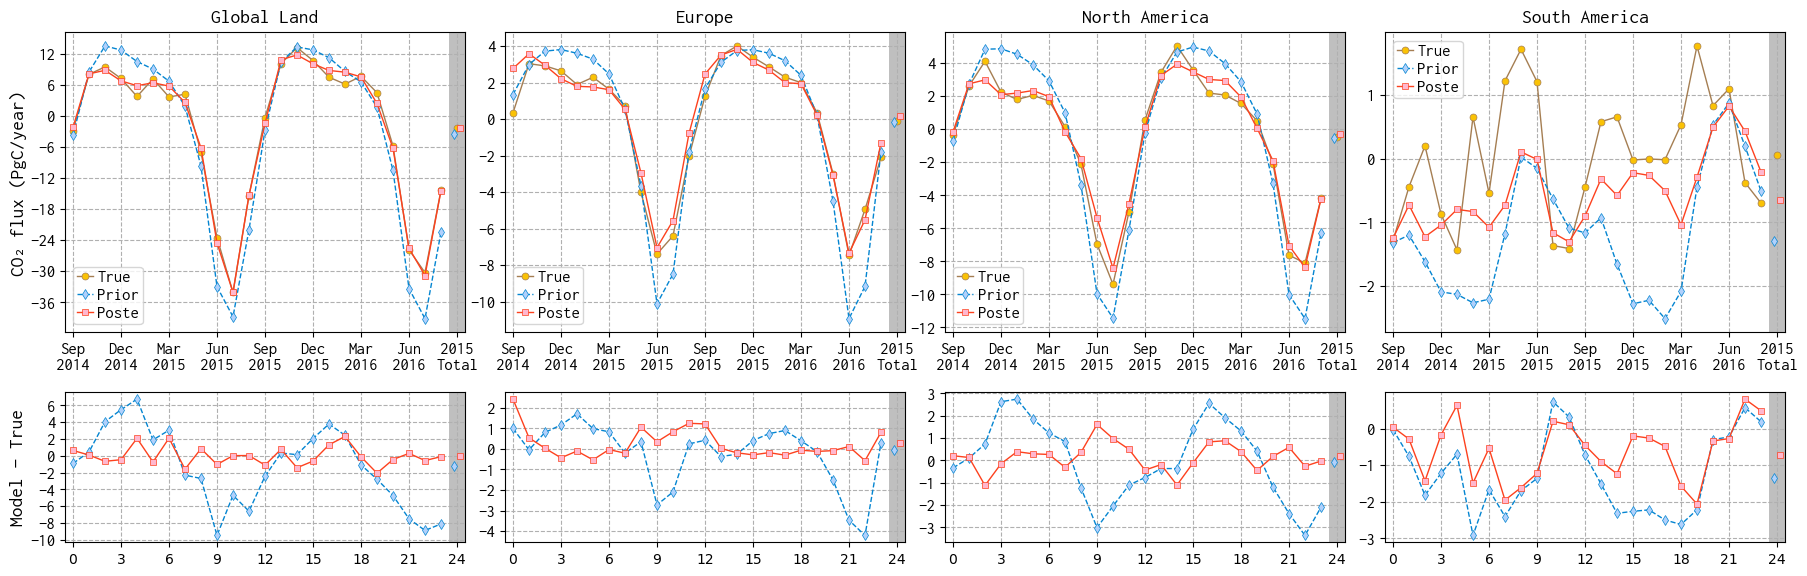

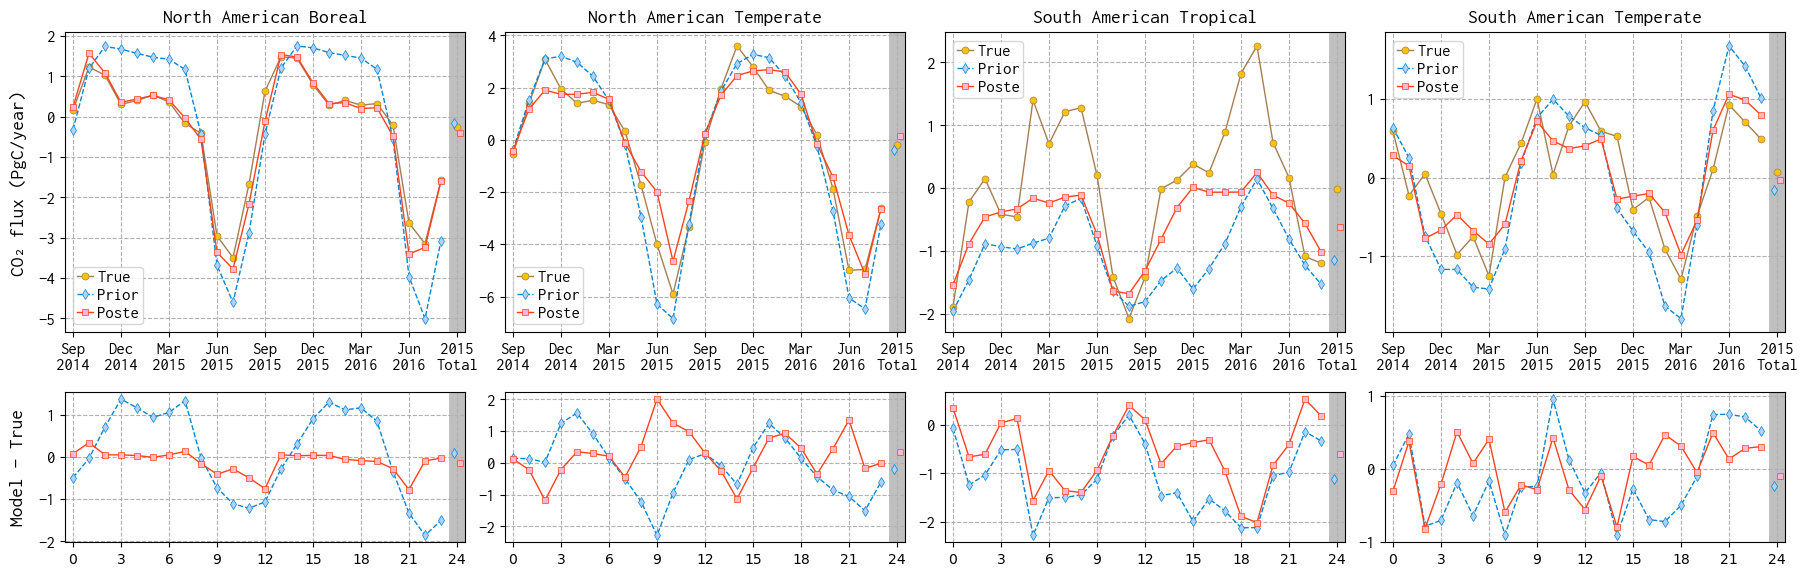

In [4]:
vf1 = Visualize_Fluxes('only_noaa_observatories')
vf1.plot_region(['Global Land', 'Europe', 'North America', 'South America'])
vf1.plot_region(['North American Boreal', 'North American Temperate', 'South American Tropical', 'South American Temperate'])

In [6]:
obs_to_assim = {'is': True}
flux_corr_structure = {'temp_corr': 2.0} # 2-month temporal correlation, no horizontal correlation
var4d = Var4D_Components('all_insitu', verbose=True, store_intermediate=True)
var4d.var4d_setup(obs_to_assim=obs_to_assim, corr_structure=flux_corr_structure, prior_unc_scale=0.25) # prior flux error = 0.25 * abs(prior flux)
var4d.var4d_chain(max_iter=500, optim_method='BFGS')

Converting CT2022 to state vector: 100%|██████████| 24/24 [00:00<00:00, 42.57it/s]


    Read Jacobian in  17.51s
    Simulated transport in  0.46s
462509 of 1156383 obs will be assimilated
  Created true obs in  18.68s


Converting SiB4 to state vector: 100%|██████████| 24/24 [00:01<00:00, 13.55it/s]


  Prior fluxes and covariance setup in  1.91s
  Simulated transport in  0.48s
      Simulated transport in  0.46s
    [1] Cost calculated in  0.57s (J = 4.826e+06)
    [1] Gradient calculated in  0.60s (⎸∂J/∂ξ⎹ = 1.018e+06)
      Simulated transport in  0.46s
    [2] Cost calculated in  0.57s (J = 3.918e+06)
    [2] Gradient calculated in  0.60s (⎸∂J/∂ξ⎹ = 8.503e+05)
      Simulated transport in  0.46s
    [3] Cost calculated in  0.59s (J = 2.962e+06)
    [3] Gradient calculated in  0.59s (⎸∂J/∂ξ⎹ = 1.433e+06)
      Simulated transport in  0.46s
    [4] Cost calculated in  0.58s (J = 1.974e+06)
    [4] Gradient calculated in  0.60s (⎸∂J/∂ξ⎹ = 1.318e+06)
      Simulated transport in  0.47s
    [5] Cost calculated in  0.58s (J = 4.462e+06)
    [5] Gradient calculated in  0.59s (⎸∂J/∂ξ⎹ = 1.52e+06)
      Simulated transport in  0.46s
    [6] Cost calculated in  0.59s (J = 1.752e+06)
    [6] Gradient calculated in  0.59s (⎸∂J/∂ξ⎹ = 1.312e+06)
      Simulated transport in  0.46s
    [7] Cos

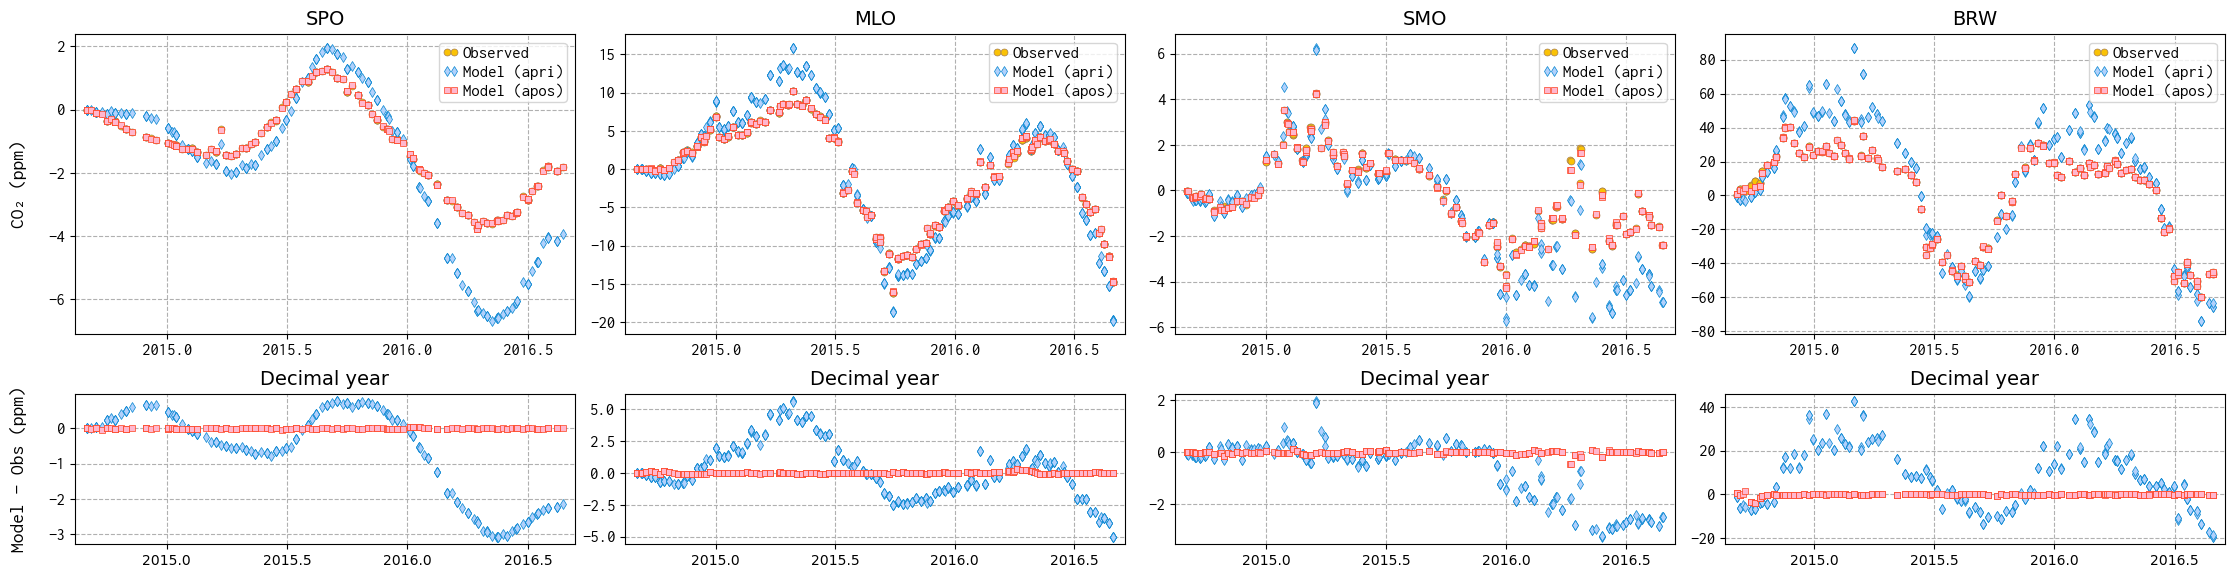

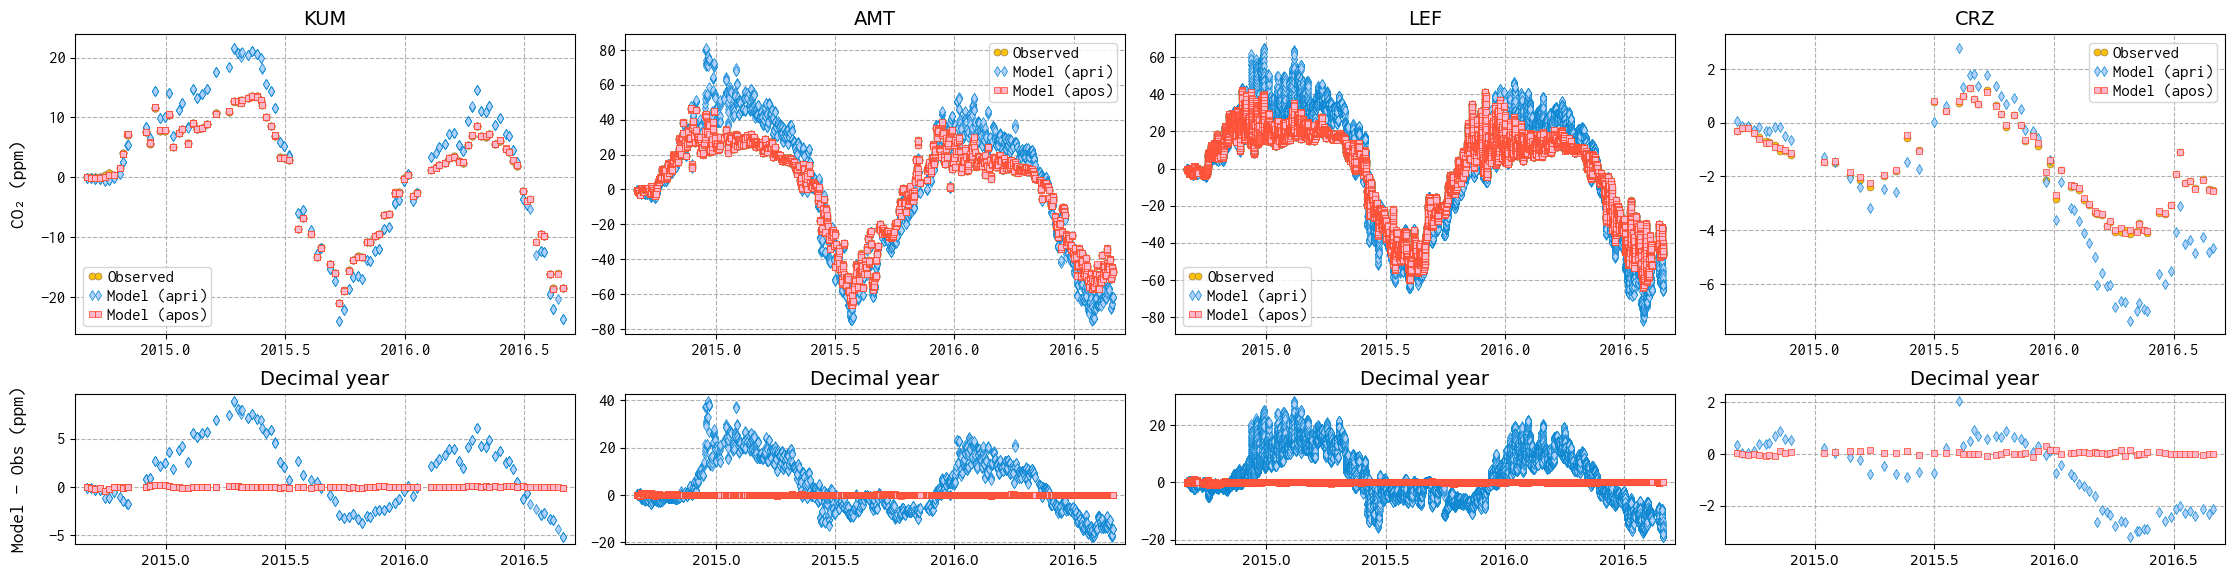

In [7]:
po2 = Visualize_Obs('all_insitu')
po2.plot_site(['spo','mlo','smo', 'brw'])
po2.plot_site(['kum','amt','lef','crz'])

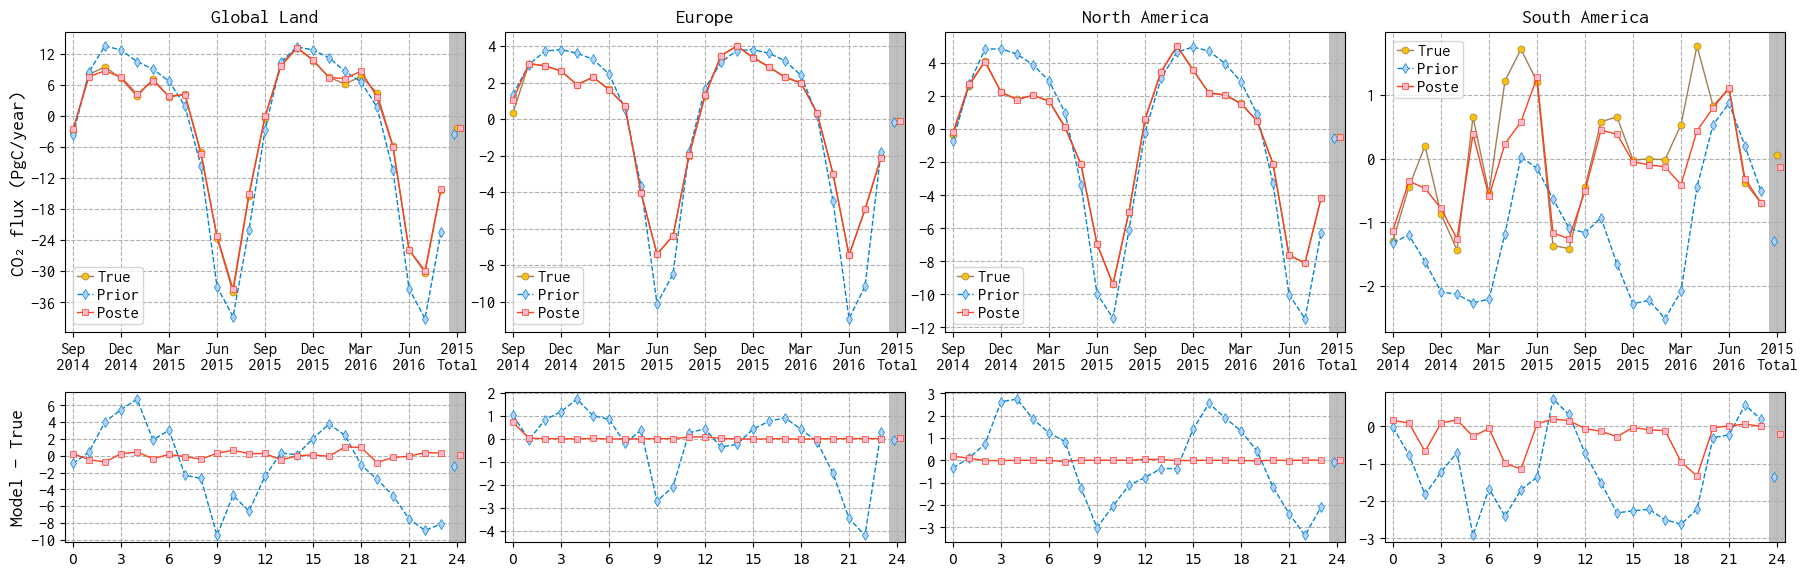

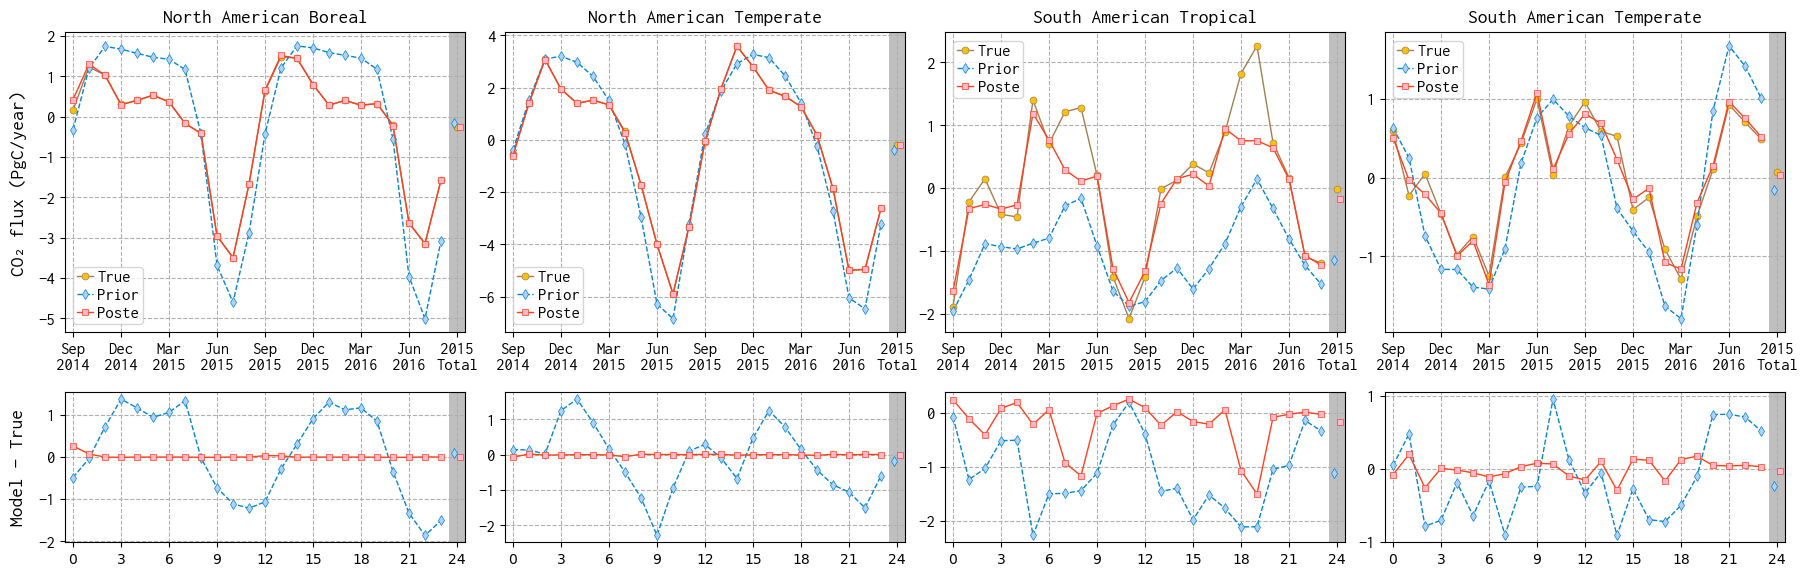

In [8]:
vf2 = Visualize_Fluxes('all_insitu')
vf2.plot_region(['Global Land', 'Europe', 'North America', 'South America'])
vf2.plot_region(['North American Boreal', 'North American Temperate', 'South American Tropical', 'South American Temperate'])